# 🌲 Mini-projeto: Árvore de Decisão

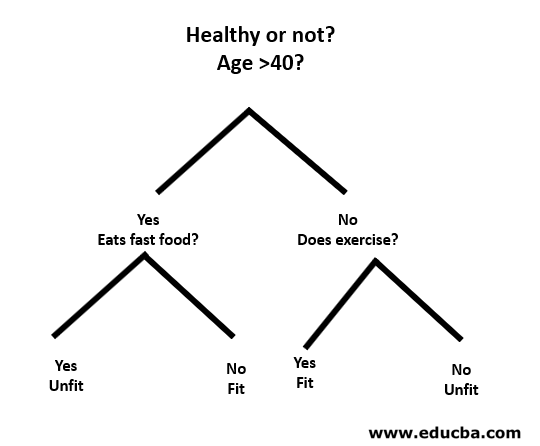

## Primeiro Passo: Coletar dados


Utilizamos, nesse pequeno projeto, o dataset do [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview) extraído diretamente do Kaggle. Os dados estão já divididos em dois grupos:

*  training set (train.csv)
*  test set (test.csv)

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("Accent")
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import math
from sklearn import model_selection

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
dados_treino = pd.read_csv('drive/My Drive/SistInteligentes/train.csv')
print(dados_treino.shape)

(891, 12)


In [23]:
dados_teste = pd.read_csv('drive/My Drive/SistInteligentes/test.csv')
print(dados_teste.shape)

(418, 11)


In [24]:
dados_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
dados_treino.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

## Segundo Passo: Analizar os dados

In [26]:
palette = ['#DDFFF7', '#93e1d8', '#ffa69e', '#aa4465', '#861657']

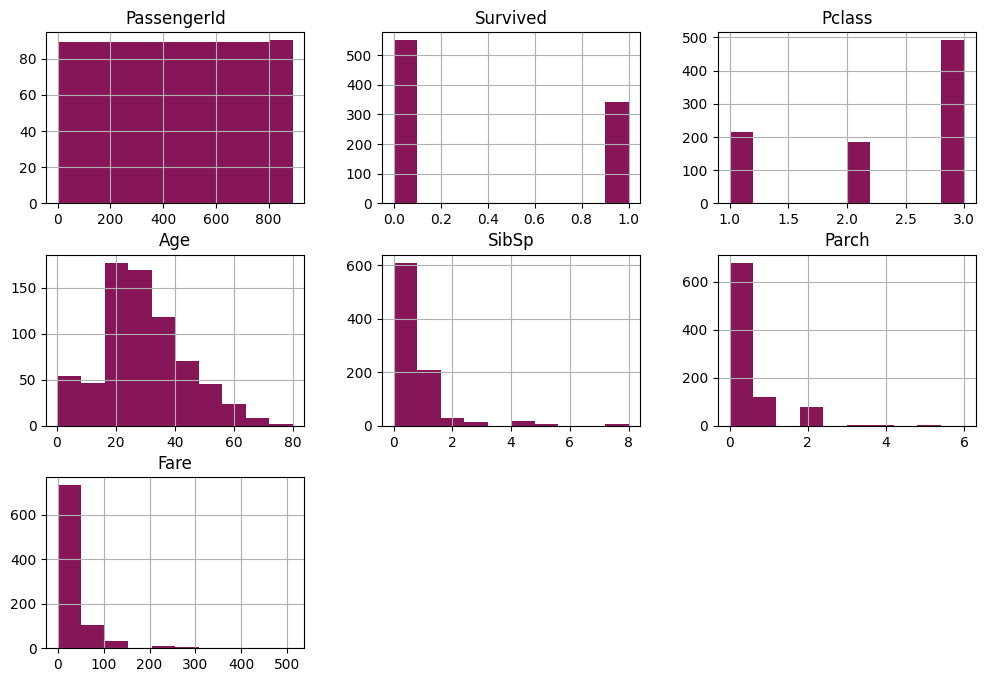

In [27]:
dados_treino.hist(figsize=(12,8), color=palette[4])
plt.show()

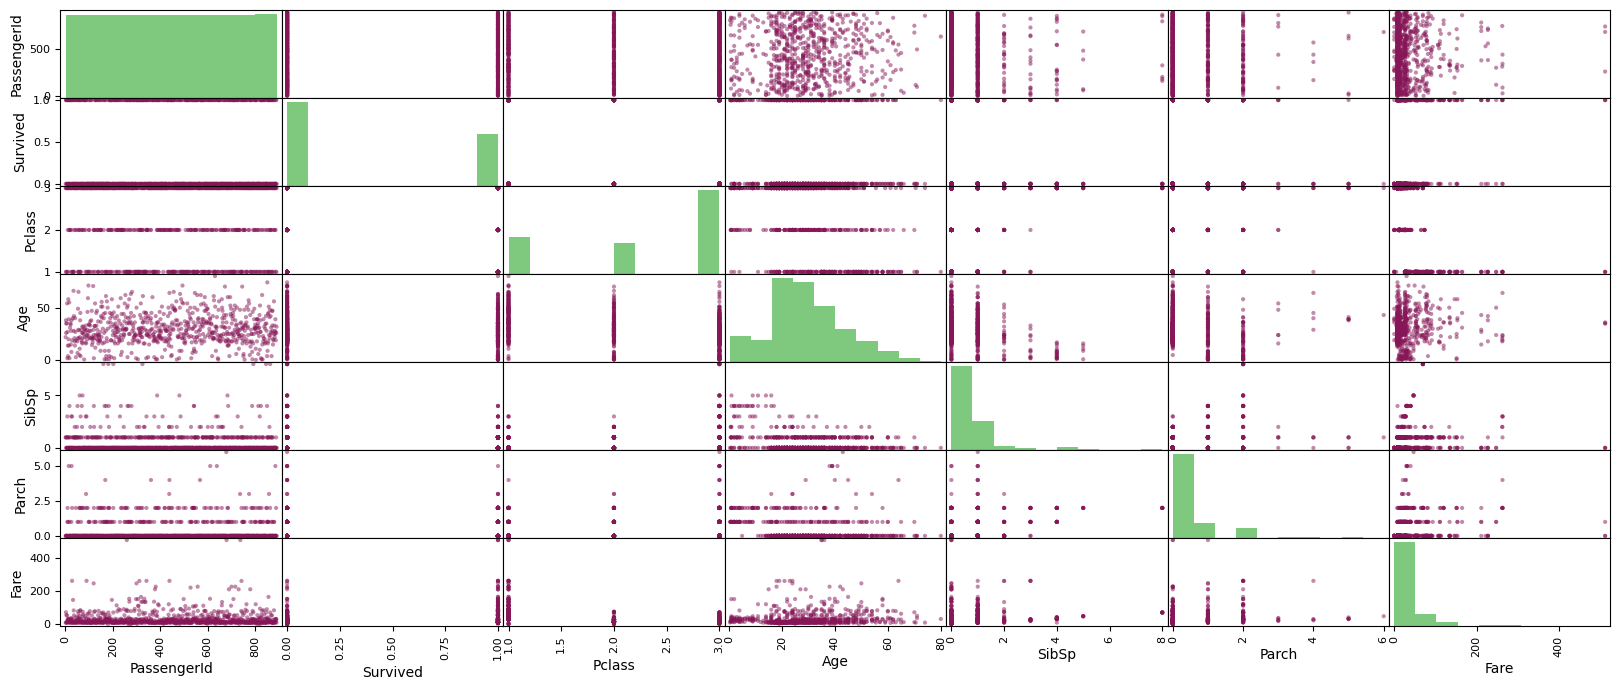

In [28]:
scatter_matrix(dados_treino, figsize=(20,8), color=palette[4])
plt.show()

In [29]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
dados_treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Temos 3 colunas com dados NULL. São elas: 
*  Age
*  Cabin
*  Embarked

Surge, com isso, algumas opções para tratarmos esses dados:


1.   Excluirmos as linhas com dados nulos;
2.   Substituirmos os valores NULL/NaN por um valor que não interfira na coluna em questão




In [31]:
dados_treino = dados_treino.dropna(axis = 0, how = 'any')

In [32]:
dados_treino.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Terceiro Passo: Análise de Modelos Regressivos

In [33]:
corr = abs(dados_treino.corr().round(4))
corr_price = corr['Survived']
corr_price.sort_values()

Parch          0.0236
Pclass         0.0345
SibSp          0.1063
Fare           0.1342
PassengerId    0.1485
Age            0.2541
Survived       1.0000
Name: Survived, dtype: float64

In [34]:
dados_treino['Embarked'].unique() #Map those values as C - 0; S - 1; Q - 2

array(['C', 'S', 'Q'], dtype=object)

In [35]:
dados_treino.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Quarto Passo: Árvore de Decisão

In [41]:
#separado as features para a criação do modelo
X = dados_treino.drop('Survived', axis = 1) #tirando apenas a coluna target
y = dados_treino['Survived'] # colocando somente a coluna target
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(X,y)

ValueError: ignored